# Interpolacion numerica
## Interpolacion lineal.

In [ ]:
import numpy as np

# Datos
x_vals = np.array([3, 5])
f_vals = np.array([19, 99])

# Estimar f(4) con interpolación lineal
x_interp = 4
f_interp = f_vals[0] + (f_vals[1] - f_vals[0]) / (x_vals[1] - x_vals[0]) * (x_interp - x_vals[0])

print(f"Estimación lineal de f(4): {f_interp}")


Estimación lineal de f(4): 59.0


## Interpolacion cuadratica.

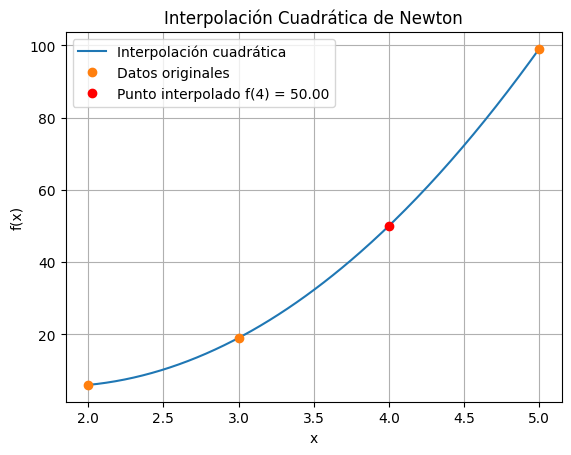

Estimación cuadrática de f(4): 50


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Datos
x_vals = np.array([2, 3, 5])
f_vals = np.array([6, 19, 99])

# Interpolación de Newton (cuadrática)
n = len(x_vals)
b = np.copy(f_vals)

for k in range(1, n):
    b[k:n] = (b[k:n] - b[k-1]) / (x_vals[k:n] - x_vals[k-1])

x = sp.Symbol('x')
polinomio_newton = b[0]
for j in range(1, n):
    termino = 1
    for i in range(j):
        termino *= (x - x_vals[i])
    polinomio_newton += b[j] * termino

# Convertimos a función evaluable
polinomio_func = sp.lambdify(x, polinomio_newton, 'numpy')

# Estimación en x = 4
x_interp = 4
f_interp = polinomio_func(x_interp)

# Evaluamos y graficamos
x_grafica = np.linspace(min(x_vals), max(x_vals), 200)
y_grafica = polinomio_func(x_grafica)

plt.plot(x_grafica, y_grafica, label='Interpolación cuadrática')
plt.plot(x_vals, f_vals, 'o', label='Datos originales')
plt.plot(x_interp, f_interp, 'ro', label=f'Punto interpolado f(4) = {f_interp:.2f}')
plt.title('Interpolación Cuadrática de Newton')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

print(f"Estimación cuadrática de f(4): {f_interp}")


## Interpolacion newton (Orden 4)

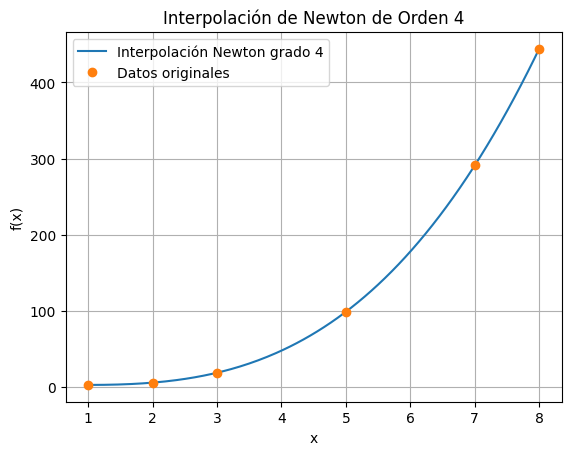

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Datos:
x_valores = np.array([1, 2, 3, 5, 7, 8])
fx = np.array([3, 6, 19, 99, 291, 444])
n = len(x_valores)
b = np.copy(fx)

# 1) Cálculo de coeficientes
for k in range(1, n):
    b[k:n] = (b[k:n] - b[k-1]) / (x_valores[k:n] - x_valores[k-1])

# 2) Construcción del polinomio
x = sp.Symbol('x')
polinomio_newton = b[0]
for j in range(1, n):
    termino = 1
    for i in range(j):
        termino *= (x - x_valores[i])
    polinomio_newton += b[j] * termino

# Convertimos a función numérica
polinomio_func = sp.lambdify(x, polinomio_newton, 'numpy')

# Evaluamos y graficamos
eje_x = np.linspace(min(x_valores), max(x_valores), 200)
eje_y = polinomio_func(eje_x)
plt.plot(eje_x, eje_y, label='Interpolación Newton grado 4')
plt.plot(x_valores, fx, 'o', label='Datos originales')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de Newton de Orden 4')
plt.grid()
plt.legend()
plt.show()
